<h1 align="center"> Detecting Credit Frauds </h1>

__________

<h3> Introduction: </h3>

In this project, we will be utilizing different predictive models to evaluate their accuracy in detecting whether a transaction is a normal payment or a fraud. The dataset we will be working with has scaled features, and the names of the features are not disclosed to maintain privacy. Despite this limitation, we can still analyze crucial aspects of the dataset.

<h3> Our Goals: </h3>

<li> Gain insights into the distribution of the limited data provided to us. </li>
<li> Use the NearMiss algorithm to create a sub-dataframe with a 50/50 split of "Fraud" and "Non-Fraud" transactions. </li>
<li> Select the classifiers to use and evaluate their accuracy to determine the best performing one. </li>
<li> Build a Neural Network model and compare its accuracy to the best performing classifier. </li>
<li> Gain an understanding of common mistakes made while working with imbalanced datasets. </li>

<h3> Data: </h3>

To begin with, we need to obtain a fundamental understanding of our data. It's important to note that, due to privacy concerns, we are unaware of the specific content of the columns, except for "transaction" and "amount." However, we do know that the unknown columns have already been scaled.

<h4> in summry: </h4>
<li> The transaction amounts are relatively small, with the mean of all transactions being approximately USD 88. </li>
<li> There are no null values in the dataset, so we do not need to focus on ways to replace missing values. </li>
<li> Non-fraud transactions occur 99.83% of the time, while fraud transactions only occur 0.17% of the time in the dataframe. </li>

In [1]:
# Importing necessary libraries:

import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum().max()

0

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


<h4> We can see that the classes are heavily skewed and we will solve this issue later. </h4>

Our original dataset is highly imbalanced, with the majority of transactions being non-fraudulent. If we use this imbalanced dataset as the foundation for our predictive models and analysis, we may encounter a significant number of errors and our algorithms may overfit since they will assume that most transactions are not fraudulent. However, our goal is not to make assumptions; rather, we want our models to identify patterns that indicate potential fraudulent activity."

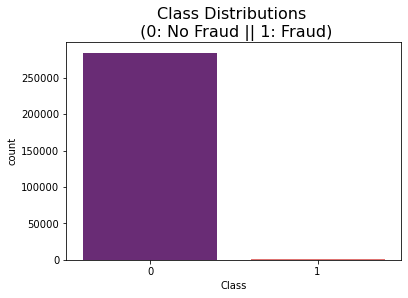

In [13]:
sns.countplot('Class', data=df, palette="magma")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=16)
plt.show()

Examining the distributions of our features can provide insight into their skewness and allow us to visualize the distributions of other features as well. To mitigate the skewness, we will be implementing techniques in this notebook that can help create less skewed distributions in the future.

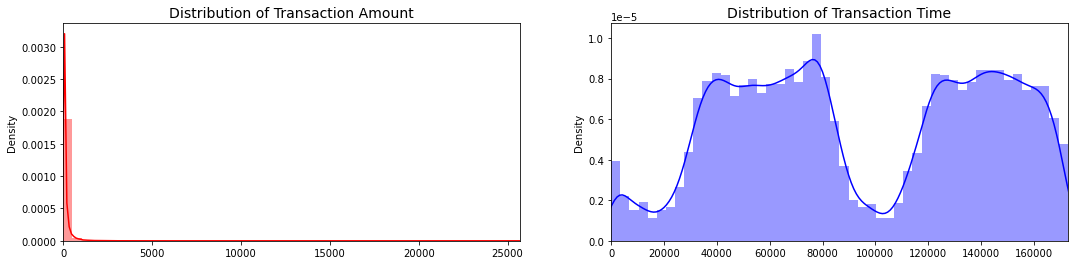

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='red')
ax[0].set_title('Distribution of Transaction Amount', fontsize=16)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='blue')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

In this phase of our project, we will begin by scaling the columns containing the <b>Time</b> and <b>Amount </b> data. These columns should be scaled just like the others. Additionally, we will create a sub-sample of the dataframe to balance the number of fraudulent and non-fraudulent cases. This will help our algorithms to better recognize patterns that can indicate whether a transaction is fraudulent or not.

Our **sub-sample** will be a dataframe that contains an equal number of fraudulent and non-fraudulent transactions, with a 50/50 ratio between the two. This means that our sub-sample will have an equal number of transactions for both fraudulent and non-fraudulent cases

Using the orignal imbalanced dataset will lead to serious over-fitting.

In [15]:
# Scalling the features Amount and Time before sub-sampling:

from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [16]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Now all the features of our dataset are scalled

<h3>Train-Test Split (Original Dataset):</h3>

Prior to applying the **Random UnderSampling technique**, it's essential to separate the original Dataset.
Why? For testing purposes. Keep in mind that although we split the data while implementing Random UnderSampling or OverSampling techniques, our goal is to evaluate our models on the original test set, not the test set generated by either of these techniques.
The primary objective is to train the model using the dataframes that were undersampled or oversampled (enabling our models to recognize patterns) and then test it on the original test set.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Since we already possess X_train and y_train for the undersampled data,
# we're using the term 'original' to differentiate them and prevent overwriting 
# these variables
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# Checking if both the train and test label distributions are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


We see that Fraud and no_fraud labels have the same distribution in both train and test sets.

<h3> Random Under-sampling</h3>

During this stage of the project, we will employ *Random Under Sampling*, a technique that involves removing data to achieve a more <b>balanced dataset</b>. This approach helps prevent overfitting in our models.

<li>First, we need to determine the degree of <b>imbalance</b> in our class by using the "value_counts()" function on the class column to identify the quantity for each label.</li>
<li>After identifying the number of instances labeled as <b>fraud transactions</b> (Fraud = "1"), we should equalize the number of <b>non-fraud transactions</b> to match the fraud transactions, assuming a 50/50 ratio. This will result in 492 cases of fraud and 492 cases of non-fraud transactions.</li>
<li>Having applied this technique, we obtain a sub-sample of our DataFrame with a 50/50 class ratio. The next step is to <b>shuffle the data</b> to ensure that our models can consistently maintain a certain level of accuracy each time we execute this script.</li>

The primary concern with "Random Under-Sampling" is the potential for our classification models to perform less accurately than desired due to a significant amount of <b>information loss</b> (reducing 492 non-fraud transactions from the original 284,315 non-fraud transactions).

In [19]:
# As our classes are highly imbalanced, we need to equalize them to achieve 
# a normal distribution across the classes.

# Lets shuffle the data before creating the subsamples:

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
254279,0.205547,0.845440,2.006457,-0.386433,-1.679245,-0.176505,0.753068,0.794557,-0.209992,0.172147,...,-0.071582,-0.159589,-0.453921,0.375651,3.448620,-0.037470,-0.249369,-0.050860,-0.018586,0
80760,1.284427,-0.306042,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,...,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,1
265095,-0.181374,0.905156,-0.017987,0.378812,0.034789,-0.764863,1.232689,1.148340,0.570125,0.384941,...,-0.264413,0.321441,1.243913,-0.223805,-1.328850,-0.260583,0.751406,0.053648,-0.001170,0
17480,1.089779,-0.657162,-30.552380,16.713389,-31.103685,6.534984,-22.105532,-4.977692,-20.371514,20.007208,...,1.733644,1.816520,-2.288686,-1.460544,0.183179,2.208209,-0.208824,1.232636,0.356660,1
15736,1.089779,-0.675866,-23.914101,13.765942,-25.733734,6.290918,-17.784824,-4.572498,-17.390764,15.794136,...,1.640037,1.773399,-1.748426,-1.093104,0.147807,1.663792,-0.221024,1.458076,0.430315,1


With our DataFrame now properly balanced, we can proceed with our <b>analysis</b> and <b>data preprocessing</b> tasks.

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


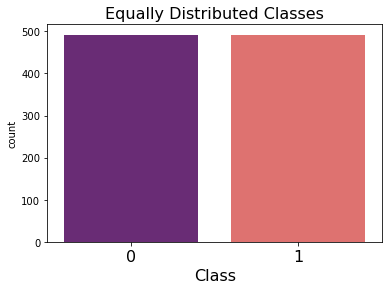

In [24]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot('Class', data=new_df, palette='magma')
plt.title('Equally Distributed Classes', fontsize=16)
plt.xlabel('Class', fontsize=16)
plt.xticks(fontsize=16)

plt.show()

<h3>Correlations:</h3>

Correlation matrices are fundamental to comprehending our data. We aim to identify features that significantly impact the likelihood of a transaction being fraudulent. Nevertheless, it's crucial to use the appropriate DataFrame (subsample) to discern which features exhibit a strong positive or negative correlation in relation to fraudulent transactions.

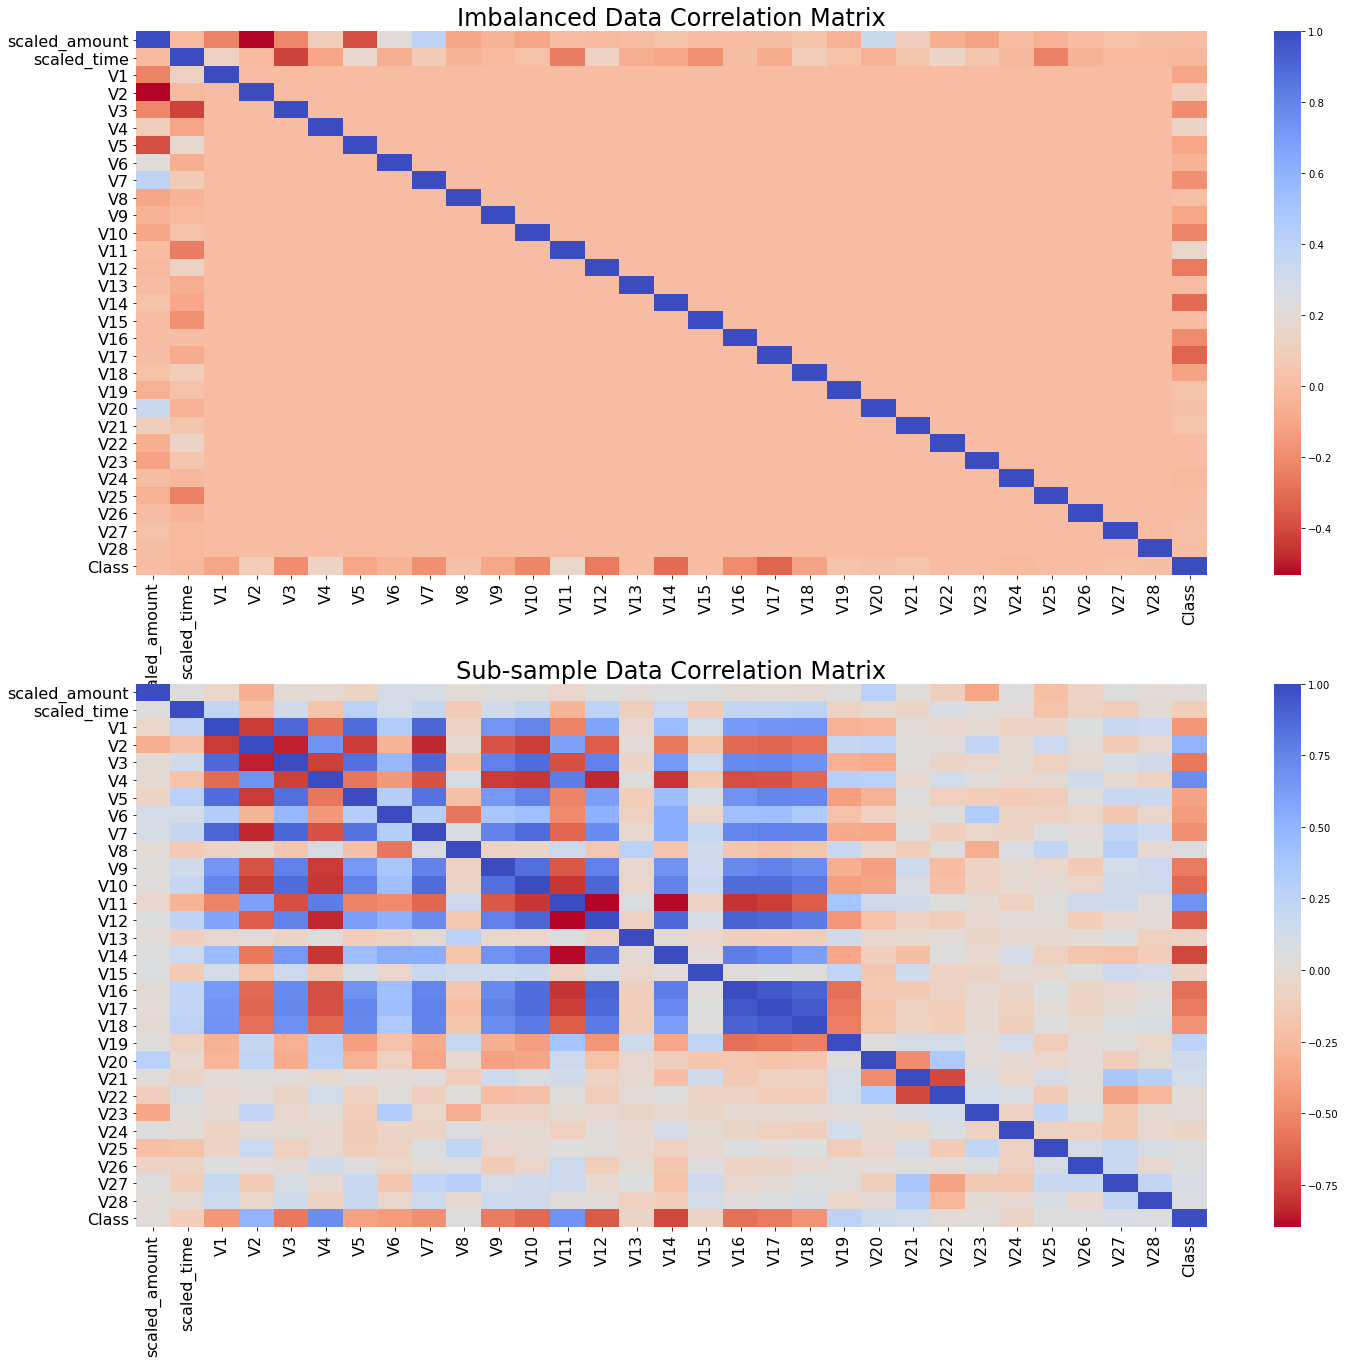

In [32]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,22))

# Correlations in the Original Dataset:

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Data Correlation Matrix", fontsize=24)

# Correlations in the Sub-sample:

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('Sub-sample Data Correlation Matrix', fontsize=24)

for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=16)

plt.show()

<li> <b>Negative Correlations:</b> V17, V14, V12, and V10 exhibit negative correlations. Observe that the lower these values, the more likely the transaction will be fraudulent. </li>

<li> <b>Positive Correlations:</b> V2, V4, V11, and V19 show positive correlations. Note that the higher these values, the more likely the transaction will be fraudulent. </li>

We will employ boxplots to gain a deeper understanding of the distribution of these features in both fraudulent and non-fraudulent transactions.

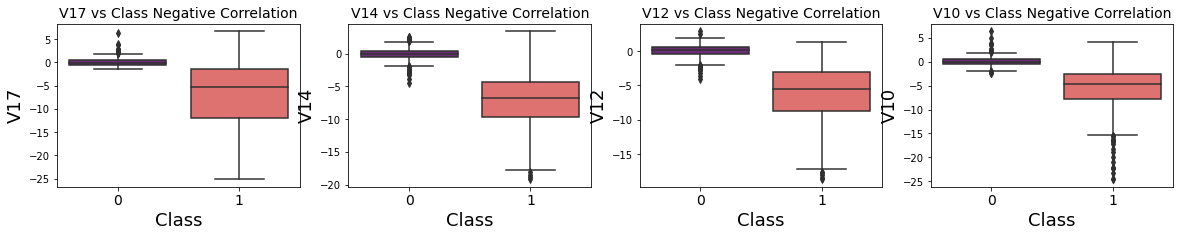

In [42]:
f, axes = plt.subplots(ncols=4, figsize=(20,3))

# Negative Correlations
#(The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="Class", y="V17", data=new_df, palette='magma', ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette='magma', ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette='magma', ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette='magma', ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')


for ax in axes:
    ax.set_title(ax.get_title(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)


plt.show()

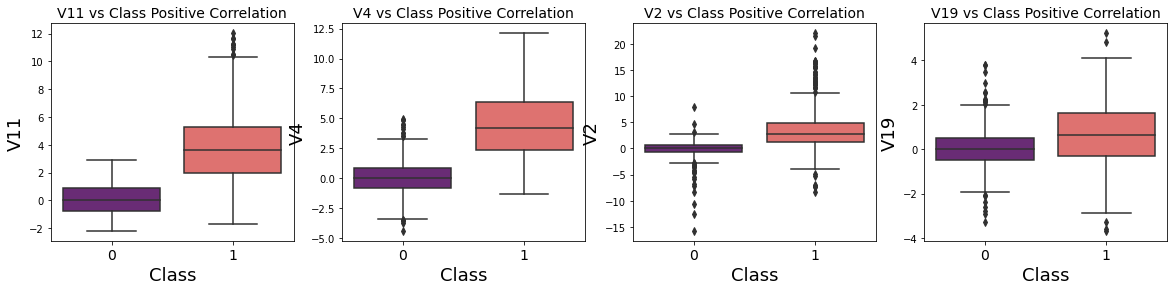

In [43]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations
#(The higher the feature the probability increases that it will be a fraud transaction)

sns.boxplot(x="Class", y="V11", data=new_df, palette='magma', ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette='magma', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, palette='magma', ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette='magma', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

for ax in axes:
    ax.set_title(ax.get_title(), fontsize=14)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_xlabel(ax.get_xlabel(), fontsize=18)
    ax.set_ylabel(ax.get_ylabel(), fontsize=18)

plt.show()

<h3> Removing Outliers </h3>

Outliers can be removed by applying the <b>Interquartile Range (IQR)</b>.
We determine this by calculating the difference between the 75th percentile and the 25th percentile. Our goal is to establish a threshold beyond the 75th and 25th percentiles, such that if any instance exceeds this threshold, it will be removed.

However, We must exercise caution when determining the threshold for removing outliers. The threshold is established by multiplying a number (e.g., 1.5) by IQR. A higher threshold will detect fewer outliers (multiplying by a larger number, e.g., 3), while a lower threshold will detect more outliers.

We begin by visualizing the distribution of the feature we plan to use for outlier elimination. Among the features V14, V12, and V10, **V14** is the only one with a Gaussian distribution.

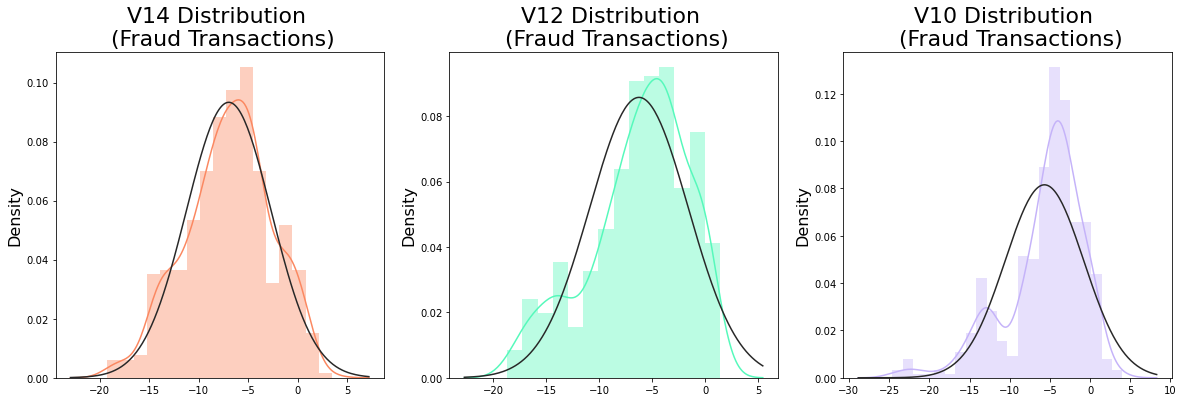

In [49]:
from scipy.stats import norm

f, axes = plt.subplots(1,3, figsize=(20,6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=axes[0], fit=norm, color='#FB8861')
axes[0].set_title('V14 Distribution \n (Fraud Transactions)', fontsize=22)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=axes[1], fit=norm, color='#56F9BB')
axes[1].set_title('V12 Distribution \n (Fraud Transactions)', fontsize=22)


v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=axes[2], fit=norm, color='#C5B3F9')
axes[2].set_title('V10 Distribution \n (Fraud Transactions)', fontsize=22)

for ax in axes:
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)

plt.show()

Once we determine the multiplier for the IQR (a lower multiplier removes more outliers), we can establish the upper and lower thresholds. We calculate the lower extreme threshold by subtracting the chosen multiplier times the IQR from Q25, and the upper extreme threshold by adding the chosen multiplier times the IQR to Q75.

In [50]:
# V14 Removing Outliers (Highest Negative Correlated with Labels)

v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('iqr: {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('----' * 44)

Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
iqr: 5.409902115485521
Cut Off: 8.114853173228282
V14 Lower: -17.807576138200666
V14 Upper: 3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-18.4937733551053, -18.8220867423816, -18.0499976898594, -19.2143254902614]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [51]:
# V12 removing outliers from fraud transactions:

v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25

v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))
print('----' * 44)

V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.4311310279993, -18.5536970096458, -18.6837146333443, -18.0475965708216]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 976
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


In [52]:
# V10 Removing outliers V10 Feature:

v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

V10 Lower: -14.89885463232024
V10 Upper: 4.92033495834214
V10 outliers: [-14.9246547735487, -16.2556117491401, -22.1870885620007, -24.4031849699728, -16.6011969664137, -19.836148851696, -23.2282548357516, -16.3035376590131, -16.6496281595399, -22.1870885620007, -15.5637913387301, -15.2399619587112, -15.1237521803455, -18.9132433348732, -20.9491915543611, -15.3460988468775, -15.1241628144947, -15.2318333653018, -16.7460441053944, -14.9246547735487, -24.5882624372475, -17.1415136412892, -22.1870885620007, -22.1870885620007, -18.2711681738888, -15.2399619587112, -15.5637913387301]
Feature V10 Outliers for Fraud Cases: 27
Number of Instances after outliers removal: 948


Now that we have removed outliers, we can visualise the truncated features by BoxPlot

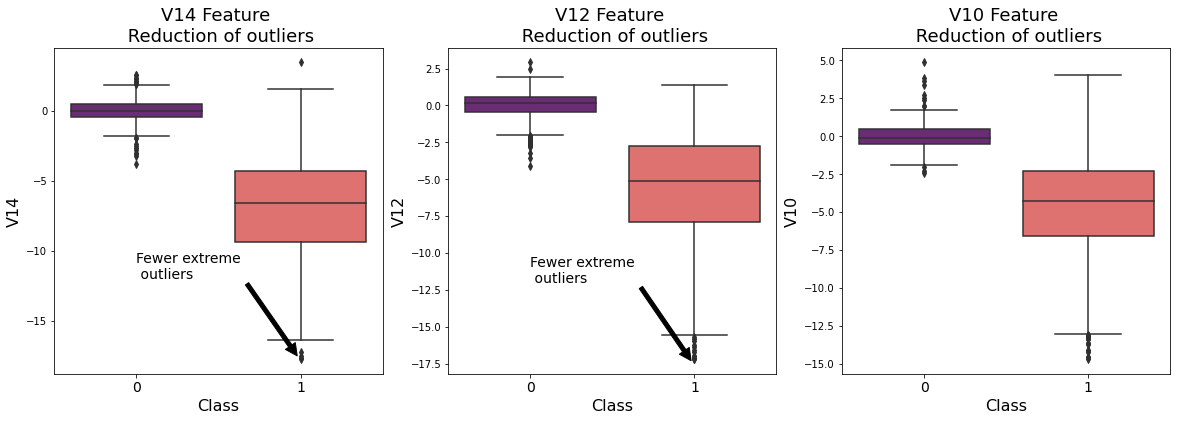

In [59]:
f, axes = plt.subplots(1,3, figsize=(20,6))


# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=axes[0], palette='magma')
axes[0].set_title("V14 Feature \n Reduction of outliers", fontsize=18)
axes[0].annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[1], palette='magma')
axes[1].set_title("V12 Feature \n Reduction of outliers", fontsize=18)
axes[1].annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[2], palette='magma')
axes[2].set_title("V10 Feature \n Reduction of outliers", fontsize=18)
axes[2].annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=16)
    ax.set_xlabel(ax.get_xlabel(), fontsize=16)

plt.show()

<h3>Dimensionality Reduction and Clustering: </h3>

In order to get a sence of classifications models on our dataset, we will first apply three techniques to reduce the dimetionality of our dataframe. Then we will visualise the results.

<li> <b> t-SNE: </b> This algorithm (t-distributed Stochastic Neighbor Embedding) is a machine learning algorithm for dimensionality reduction and visualization of high-dimensional data. It works by preserving local structures in the data while trying to minimize the divergence between probability distributions in the high-dimensional and low-dimensional spaces. The result is a visually interpretable, low-dimensional representation that makes it easier to identify patterns, clusters, and relationships in complex datasets.</li>

<li> <b> PCA: </b> Principal Component Analysis is a statistical technique for dimensionality reduction that transforms high-dimensional data into a lower-dimensional space. It identifies the axes, called principal components, that capture the most variance in the data, and projects the data onto these new axes. By retaining only a few principal components, PCA can simplify complex datasets, making them easier to analyze and visualize while preserving much of the original information.</li>

<li> <b> Truncated SVD: </b> Truncated Singular Value Decomposition is a dimensionality reduction technique that works on sparse matrices and is particularly useful for text data or other large-scale datasets. It decomposes a given matrix into three smaller matrices (U, Σ, and V), capturing the most significant information in the process. By retaining only a subset of singular values and corresponding singular vectors, Truncated SVD reduces the dimensionality of the data while preserving its essential structure and relationships.</li>

In [61]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation:

t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation:

t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD:

t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 5.3 s
PCA took 0.0062 s
Truncated SVD took 0.006 s


Now we caan visualise the new dataframe with reduced dimentionality by these three techniques.

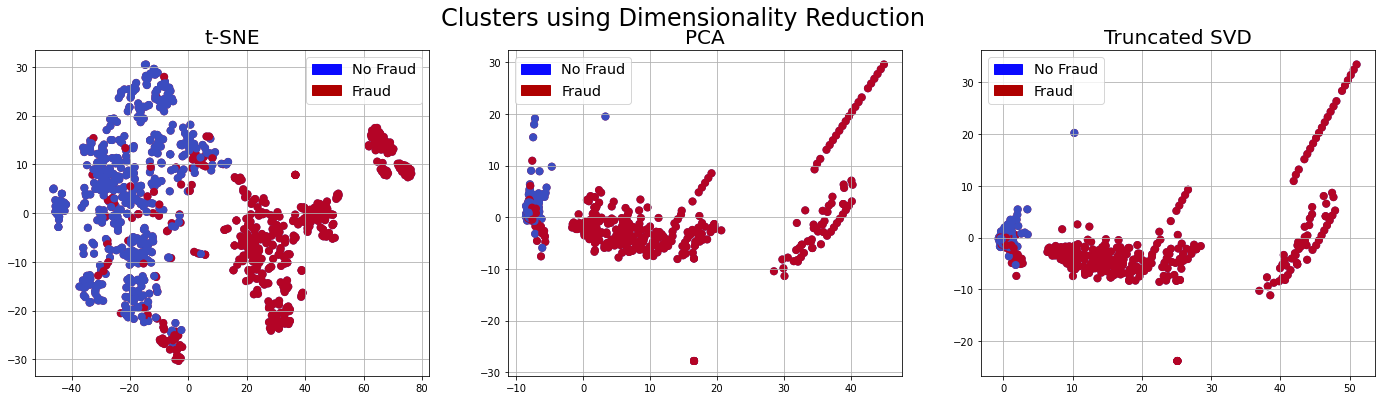

In [68]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=24)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot:
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=20)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch], fontsize='x-large')


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=20)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch], fontsize='x-large')

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=20)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch], fontsize='x-large')

plt.show()

We can see that all three techniques can reduce dimentionality without loosing critical information about the category of cases. in all three plots two calsses of Fraud, No-fraude are visibly seperated.
_______

<h2> Classification </h2>

We will use four different classifications method to detect classify the Fraud and Non-fraude transactions in our dataset:

<li> <b> Logistic Regression </b> </li>
<li> <b> K-Nearest Neighbor (KNN) </b> </li>
<li> <b> Support Vector Classifier (CSV) </b> </li>
<li> <b> Decission Tree </b> </li>




In [69]:
# Undersampling before cross validating (prone to overfit):

X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [70]:
# Our data is already scaled we should split our training and test sets:

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Turn the values into an array for feeding the classification algorithms:

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [72]:
# Let's implement simple classifiers:

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [73]:
# Now we fit the models onto our data:

from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")


Classifiers:  LogisticRegression Has a training score of 94.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 92.0 % accuracy score


We can see that all classifierss do a good job in seperating the two classes of transactions. However, <b>Logistic Regression</b> does a better job.

<h3> Hyper-parameter Tuning</h3>

Now we try to find the best hyper parameters for our classifiers to improve the acuuracy of classification. We will use <b>GridSearchCV</b> for finding the best values.

Then, we train our classifiers using the best parameters suggested by the GridSearchCV.

In [78]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression: 

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)

# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

# KNN:

knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_train, y_train)

# KNN best estimator:

knn = grid_knn.best_estimator_


# Support Vector Classifier:

svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator:

svc = grid_svc.best_estimator_


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# Decission Tree best estimator:
tree_clf = grid_tree.best_estimator_


In [85]:
models = (log_reg, knn, svc, tree_clf)
models

(LogisticRegression(C=1),
 KNeighborsClassifier(n_neighbors=2),
 SVC(C=0.5, kernel='linear'),
 DecisionTreeClassifier(max_depth=3, min_samples_leaf=6))

Next step is to investigate the accuracy of our modified models using <b>Cross-Validation</b>

In [87]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.93%
Knears Neighbors Cross Validation Score 93.41%
Support Vector Classifier Cross Validation Score 93.67%
DecisionTree Classifier Cross Validation Score 93.8%


_____

<h3> Training Accuracies : </h3>

Now we can measure the accuracy of our four models on the Training set.

In [89]:
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [90]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9776678405724188
KNears Neighbors:  0.930418134048857
Support Vector Classifier:  0.9778565039968696
Decision Tree Classifier:  0.9363994633573705


<h3> The Receiver Operating Characteristic (ROC): </h3>

<b>ROC</b> curve is a graphical representation used to evaluate the performance of binary classifiers. The ROC curve plots the True Positive Rate (TPR) or sensitivity against the False Positive Rate (FPR) or 1-specificity for different classification threshold values. The TPR is the ratio of true positive instances to the total positive instances, while FPR is the ratio of false positive instances to the total negative instances.

The area under the ROC curve (AUC-ROC) is a popular performance metric that ranges from 0 to 1. An AUC-ROC value of 0.5 indicates that the classifier performs no better than random chance, while a value of 1 indicates perfect classification. The greater the AUC-ROC value, the better the classifier is at distinguishing between the two classes.

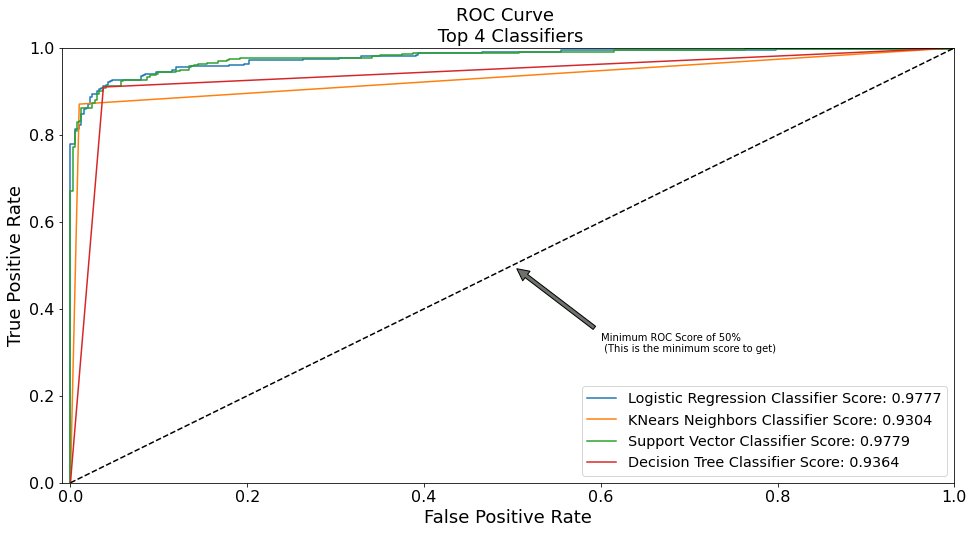

In [94]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=18)
    plt.ylabel('True Positive Rate', fontsize=18)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend(fontsize='x-large')
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)

plt.show()

From this ROC curve it is obvious that the Logistic Regression (and SVC next) is the best model to classify the transactions.

We should explore this model further by looking at metrics deduced from the <b> Confussion Matrix</b>

In [95]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [97]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.93
Precision Score: 0.98
F1 Score: 0.95
Accuracy Score: 0.96
---------------------------------------------------------------------------------------------------------------------------------------


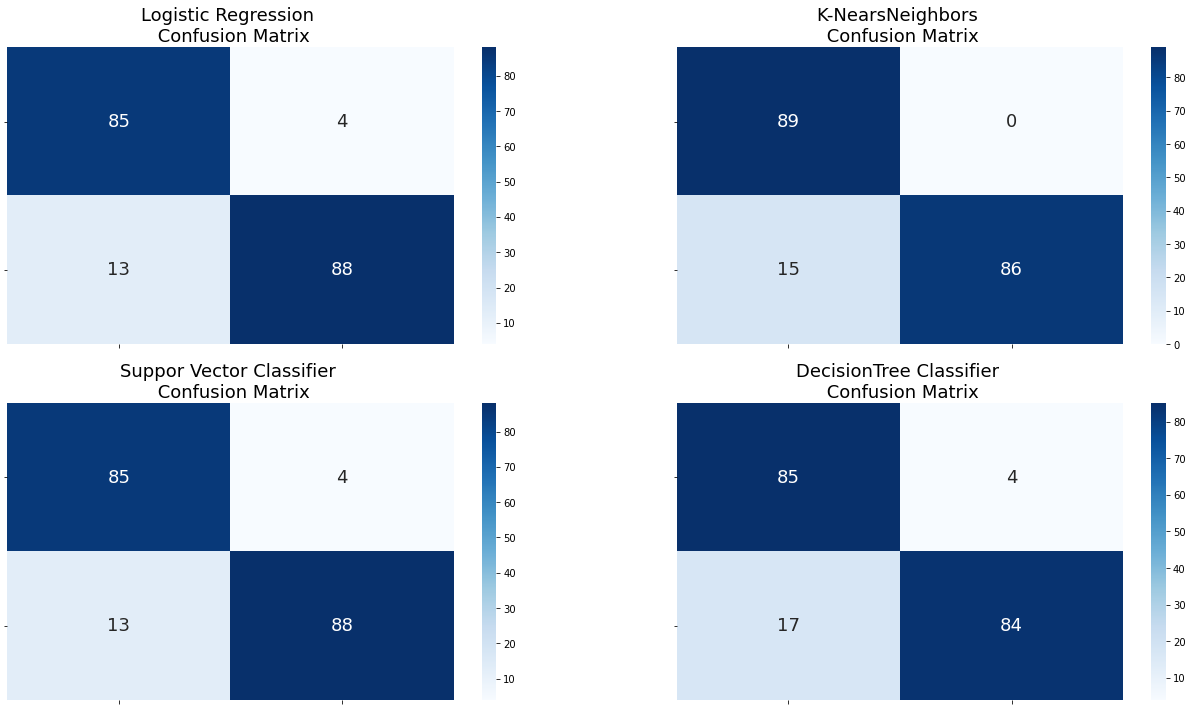

In [116]:
from sklearn.metrics import confusion_matrix


y_pred_log_reg = log_reg.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, annot_kws={"size": 18}, cmap="Blues")
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=18)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, annot_kws={"size": 18},cmap="Blues")
ax[0][1].set_title("K-NearsNeighbors \n Confusion Matrix", fontsize=18)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, annot_kws={"size": 18}, cmap="Blues")
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=18)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True,annot_kws={"size": 18}, cmap="Blues")
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=18)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()